In [1]:
import pandas as pd
import utils

TS = 48

samples = [1] + list(range(3, 11))
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)


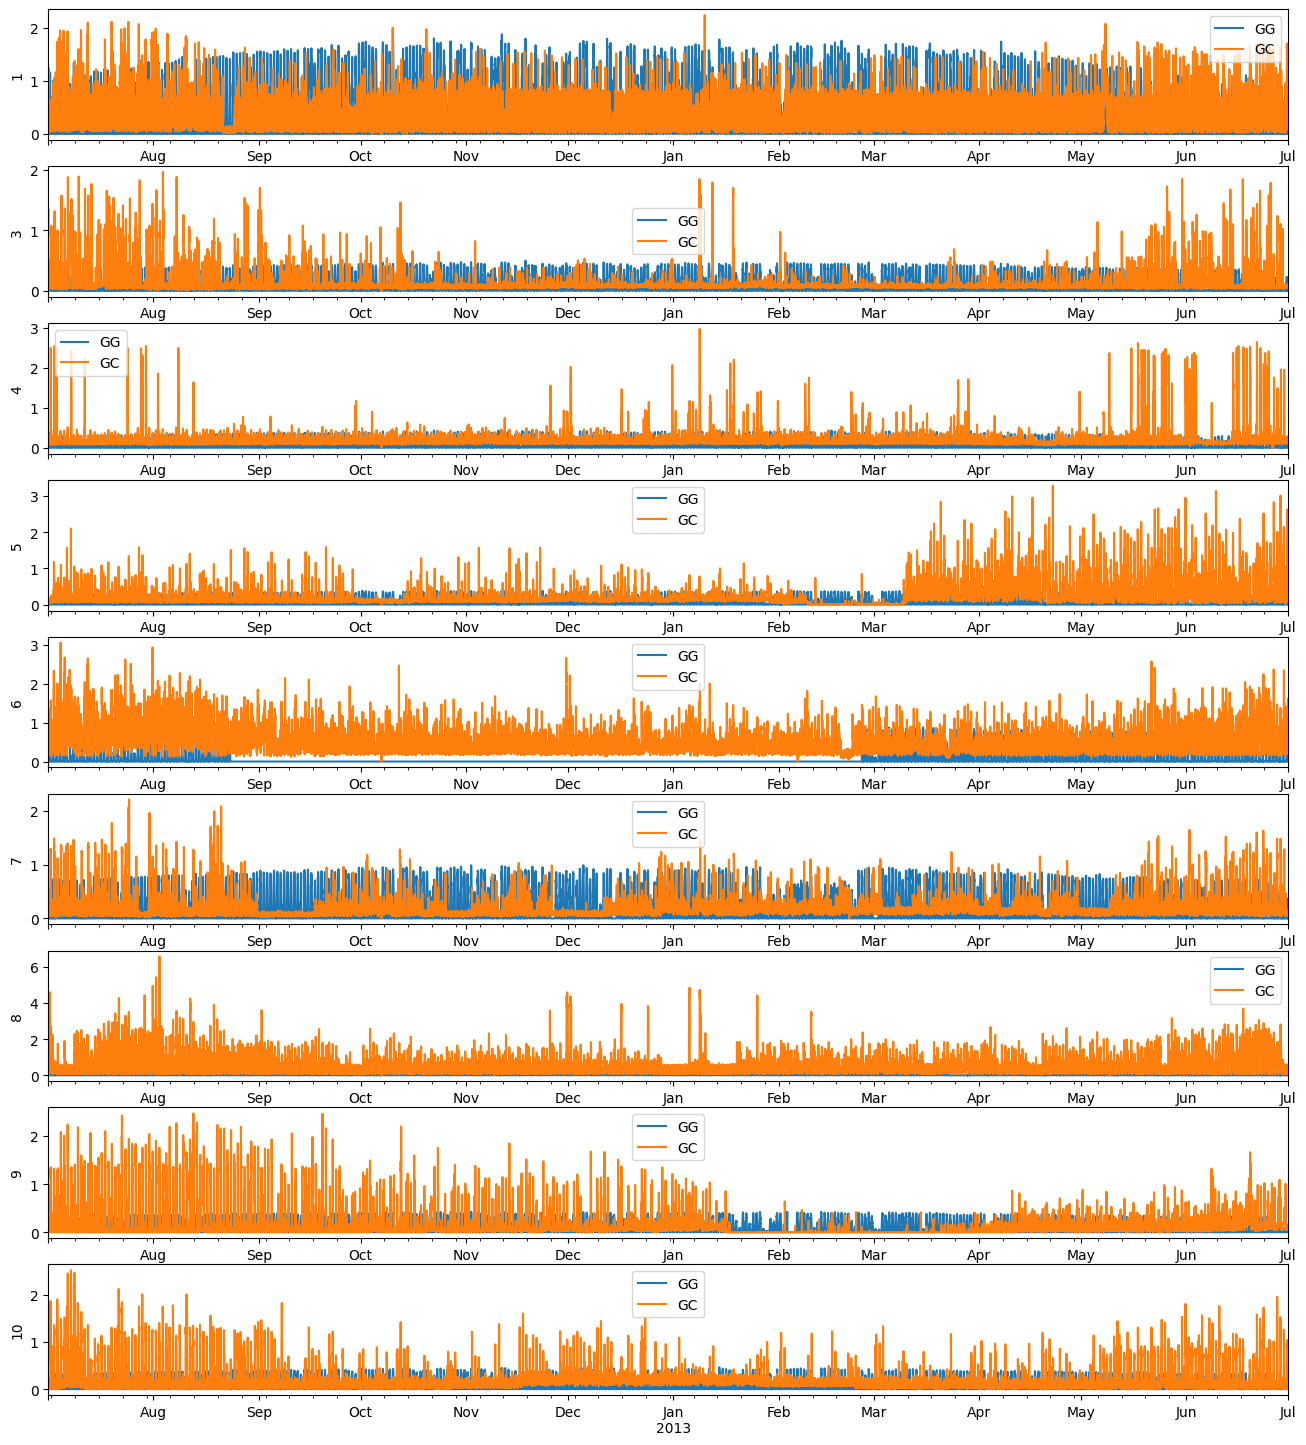

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df_raw), ncols=1, figsize=(16,18))
for i, df in enumerate(df_raw):
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(samples[i]))
    

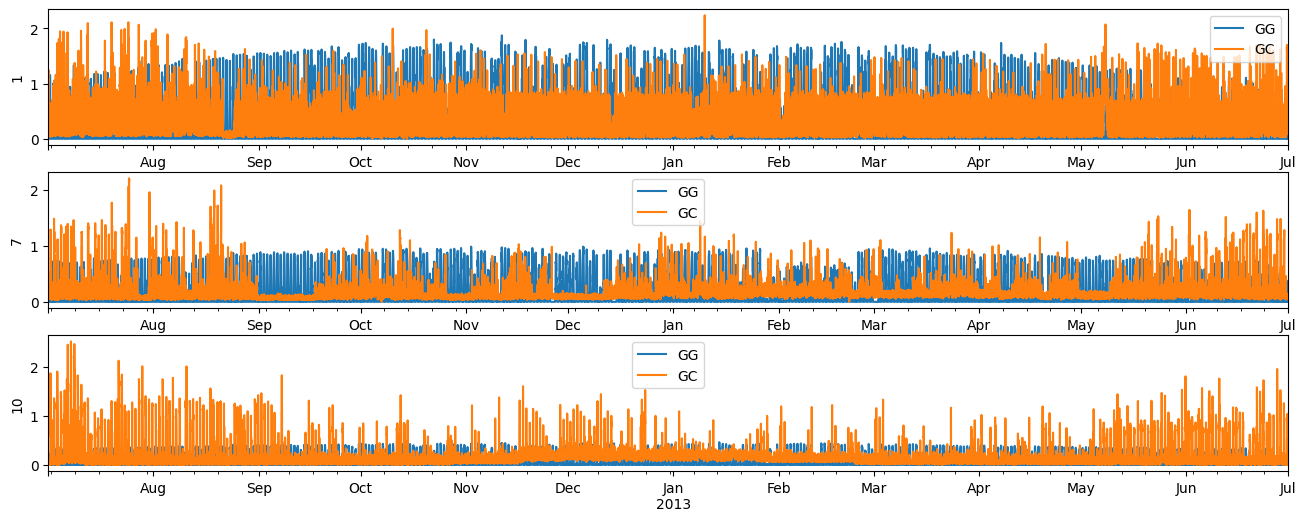

In [3]:
selected = [1, 7, 10]
df_sel = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, s in enumerate(selected):
    df = df_raw[samples.index(s)]
    df_sel.append(df)
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))

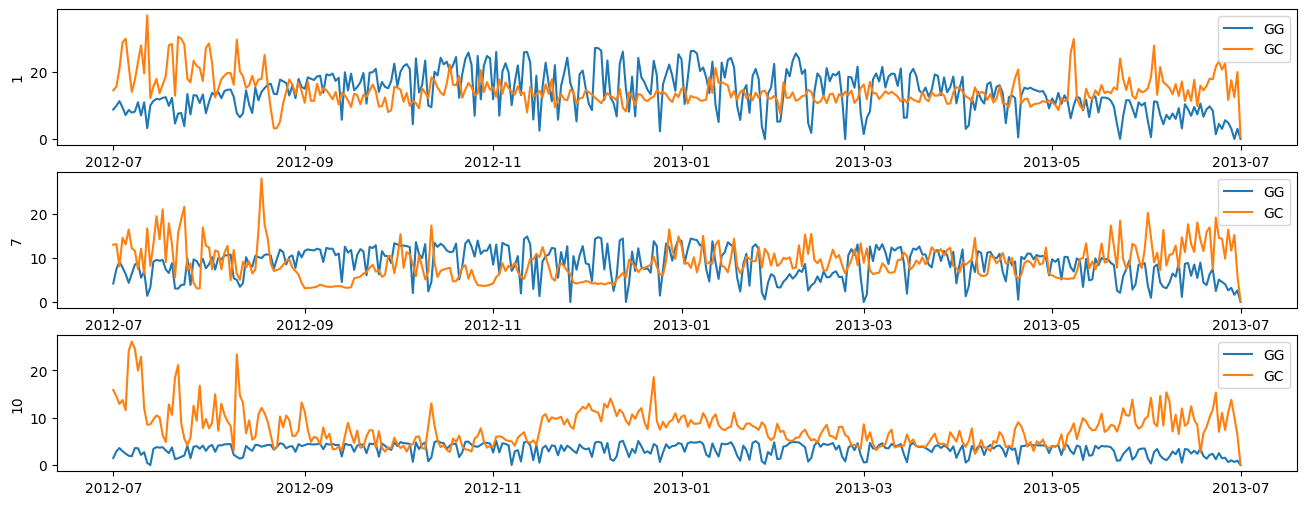

In [4]:
df_daily = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df1 = df.groupby(df.index.date).sum()
    df_daily.append(df1)
    df1[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))
    

scss 0.24605846840606838 0.23838402510358192
scss 0.3213533355419387 0.30794434267791426
scss 0.4542228227547017 0.1932540877296598


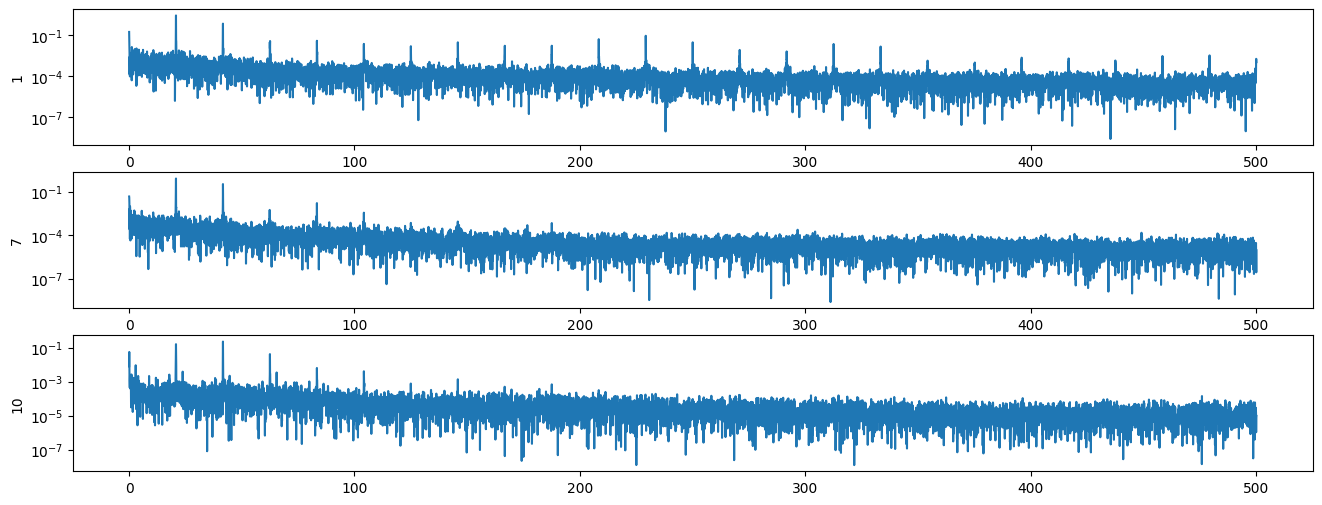

In [84]:
from scipy import signal
import numpy as np

fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df['GRID'] = df['GC'] - df['GG']
    df['PAT'] = np.where(df['GRID'] <= 0, 1, -1)
    
    gd_export = df[df['GRID']<0]['GRID'].sum()
    gd_import = df[df['GRID']>0]['GRID'].sum()
    # df[['GRID']].plot(ax=axes[i])
    f, Pxx_den = signal.periodogram(df['GRID'], 1e3)
    axes[i].semilogy(f[1:], Pxx_den[1:])
    
    axes[i].set_ylabel('{}'.format(s))
    sc = 1 + gd_export/df['GG'].sum()
    ss = 1 - gd_import/df['GC'].sum()
    print('scss', sc, ss)
    

GG, GC, mean, std 13.975975409836067 14.42591256830601 0.44993715846994525 12.88611660340045
86.6% 13.336053761870396
95.0% 17.63142596300388
1348.367 5115.207
GG, GC, mean, std 8.64312568306011 9.019478142076503 0.37635245901639375 8.720292719645252
86.6% 9.096645178661646
95.0% 12.003409418543397
921.3240000000001 3163.384
GG, GC, mean, std 3.3243114754098357 7.813434426229507 4.489122950819672 6.46096515517935
86.6% 10.950088105999022
95.0% 13.103743157725471
1674.637 1216.6979999999999


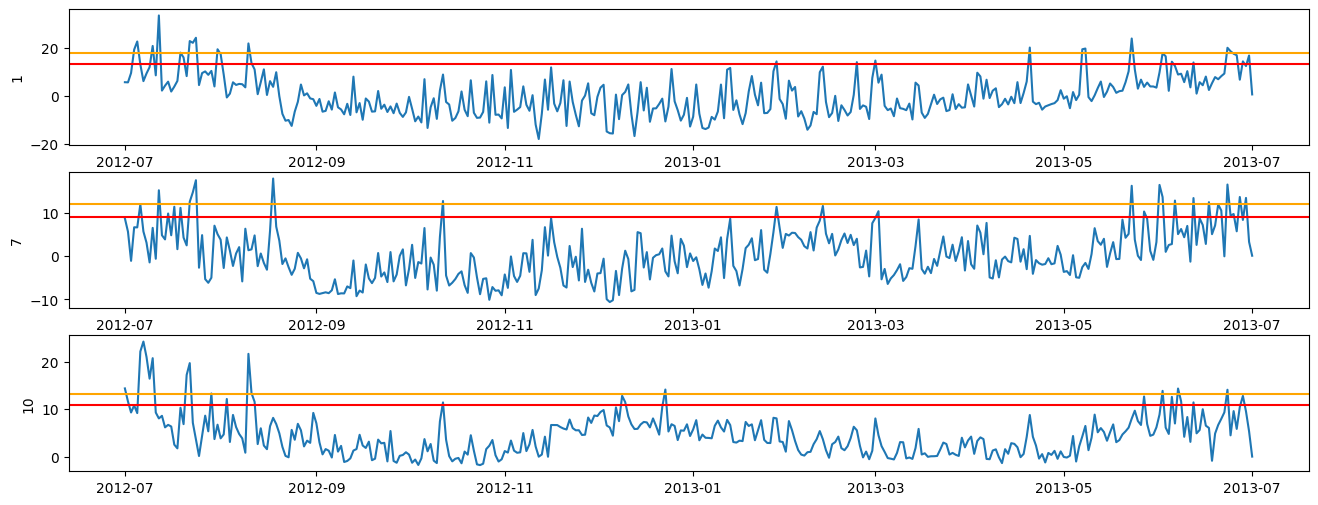

In [60]:
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_daily)):
    df['Diff'] = df['GC'] - df['GG']
    df['Diff'].plot(ax=axes[i])
    
    print('GG, GC, mean, std', df['GG'].mean(), df['GC'].mean(), df['Diff'].mean(), 1.5*df['Diff'].std())
    d_86 = df['Diff'].mean()+1.5*df['Diff'].std()
    d_95 = df['Diff'].mean()+2.0*df['Diff'].std()
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    axes[i].set_ylabel('{}'.format(s))

    df['D86'] = df['Diff'] - d_86
    print(df[df['Diff']>0]['Diff'].sum(), df['GG'].sum())
